## Things to do
* Fetch image from one folder
* Distinguish the image as one color primarily red,yellow,blue,orange,brown,green,white(maybe)
* Save the groups in their own folders

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab,deltaE_cie76
import os

%matplotlib inline

In [56]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [57]:
# Setting Up File Path
fetch_file = "Images/Test"

COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [255,0,0],
    'BROWN':[150,75,0],
    'ORANGE':[255,160,0],
    'WHITE': [255,255,255]

}

images=[]

for file in os.listdir(fetch_file):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(fetch_file, file)))


In [58]:
# Obtaining Hex Values
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))


In [69]:
def get_colors(image,n_o_c,chart):
    #modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image =image.reshape(image.shape[0]*image.shape[1], 3)
    clf = KMeans(n_clusters=n_o_c,n_init='auto')
    labels =clf.fit_predict(modified_image)

    counts=Counter(labels)
    counts=dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (chart):
        plt.figure(figsize = (10, 10))
        plt.subplot(1,2,1)
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.subplot(1,2,2)
        plt.imshow(image)
    
    return rgb_colors


[array([ 7.09476662, 38.94377652, 42.80268741]),
 array([163.76672149, 198.38075658, 248.13020833]),
 array([ 27.88392857,  81.97544643, 113.37053571]),
 array([ 85.98561151, 136.0647482 , 173.5971223 ]),
 array([16.91592357, 64.69808917, 84.36942675])]

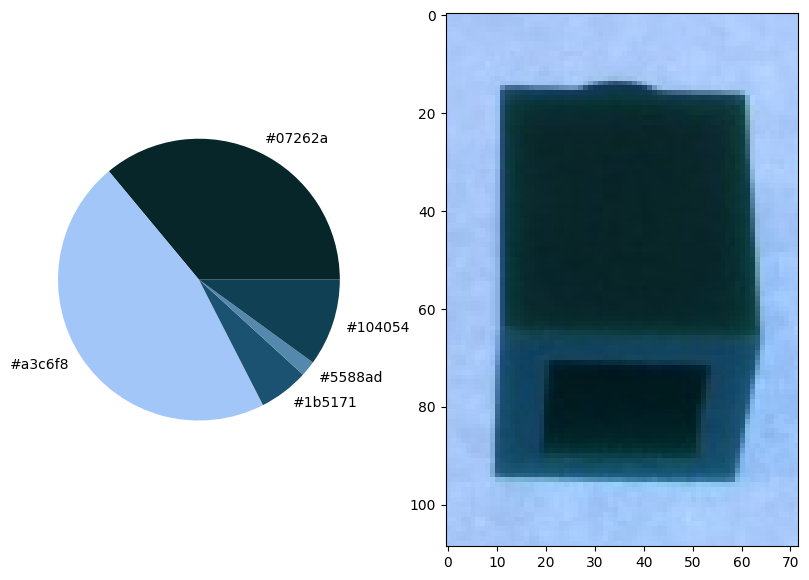

In [176]:
get_colors(images[4],5,True)

In [71]:
def save_file(image,color,index):
    path= "Images/{}/{}.jpg".format(color,index)
    cv2.imwrite(path,image)

In [102]:
def match_image_by_color(image,color,threshold=60,noc=10):
    image_colors = get_colors(image,noc,False)
    selected_colors = rgb2lab(np.uint8(np.asarray([[color]])))
    select_image= False
    for i in range(noc):
        curr_color=rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_colors,curr_color)
        if(diff<threshold):
            select_image=True
    return select_image

In [152]:
def show_selected_images(images,color,threshold,colors_to_match,str,save=False):
    
    index=1

    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 30, index)
            plt.imshow(images[i])
            index += 1
            paths= "Images/Subset/{}".format(str)
            if save:
                if os.path.isdir(paths):
                    plt.imsave(paths+"/{}.jpg".format(index-1),images[i])
                else:
                    os.makedirs(paths)
                    plt.imsave(paths+"/{}.jpg".format(index-1),images[i])

            

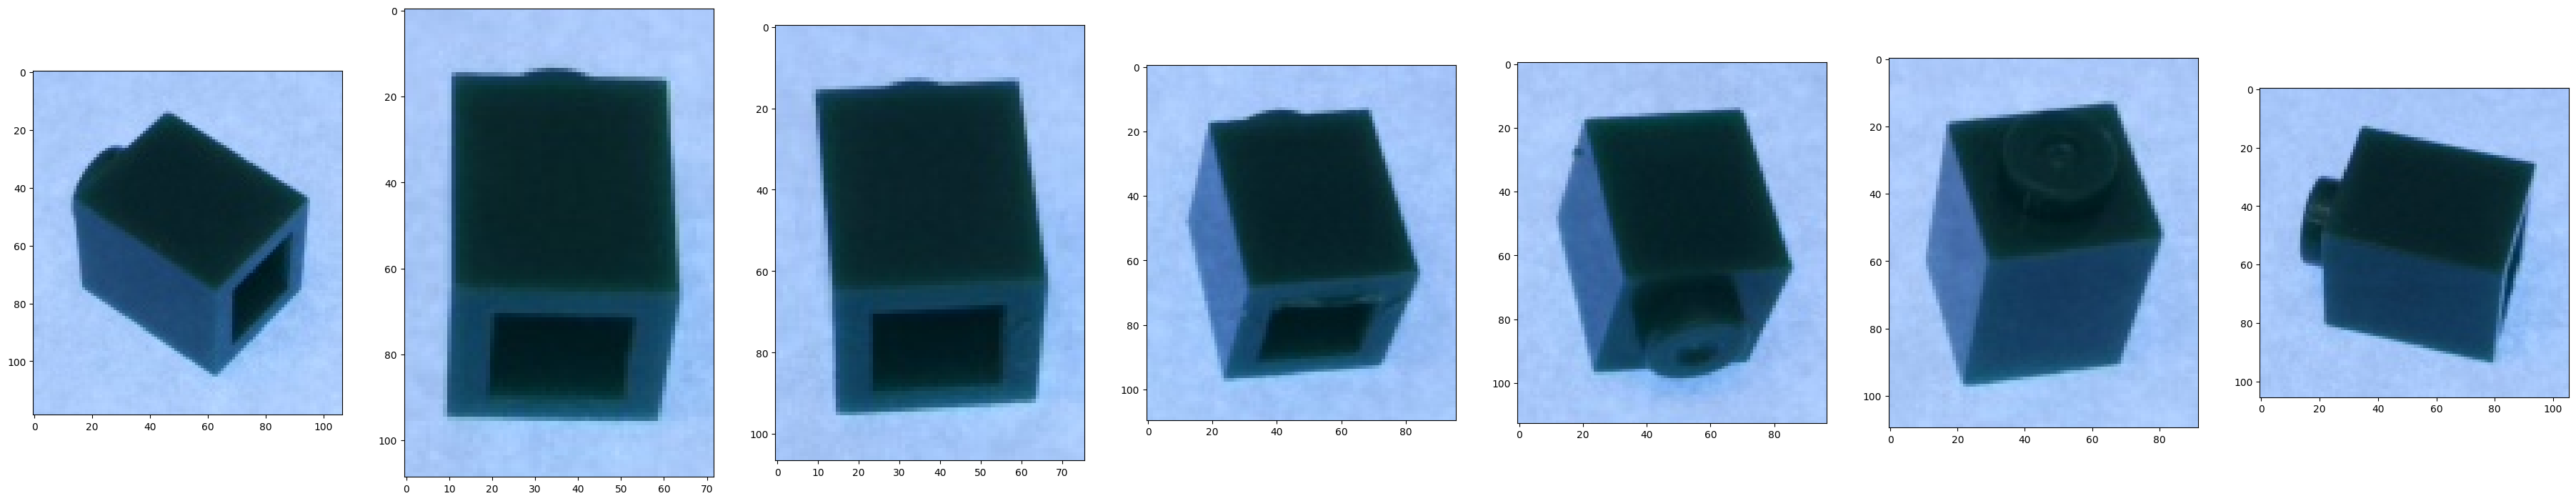

In [180]:
plt.figure(figsize = (200, 100))
show_selected_images(images, COLORS['GREEN'], 10, 5,'Green',True)

In [177]:
COLORS = {
    'GREEN': [7,38,42],
    'BLUE': [0, 0, 128],
    'YELLOW': [150,114,68],
    'RED': [99,37,62],
    'BROWN':[150,75,0],
    'ORANGE':[255,160,0],
    'WHITE': [255,255,255]
}